<a href="https://colab.research.google.com/github/Kushagra3219/SNA/blob/main/community_detection_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

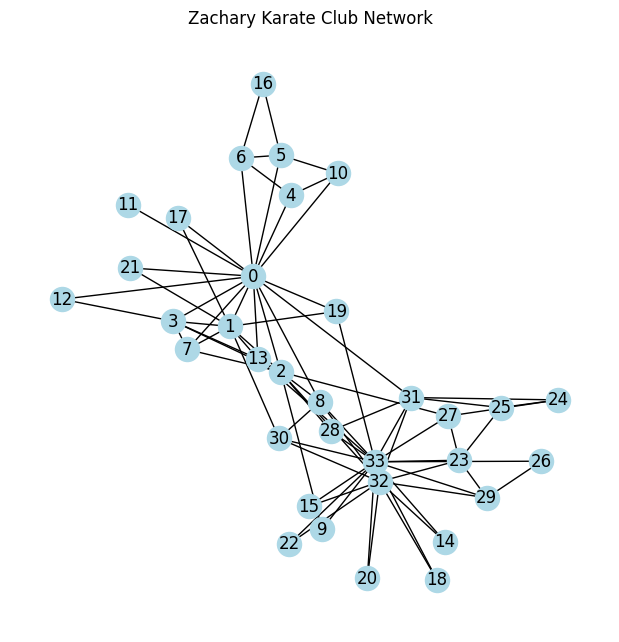

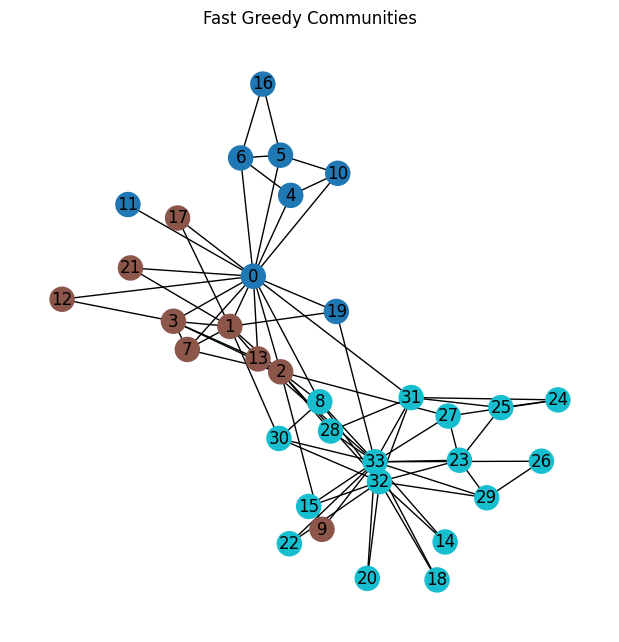

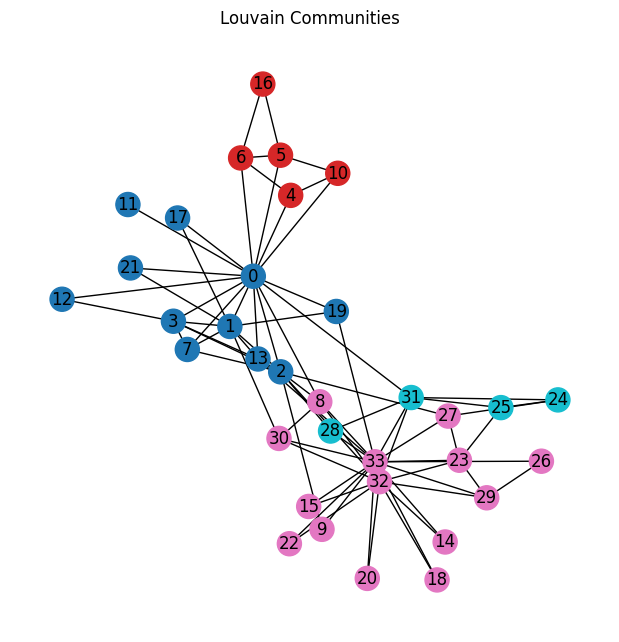

Adjusted Rand Index (ARI): 0.5456241593265935
Normalized Mutual Information (NMI): 0.6455354377299695


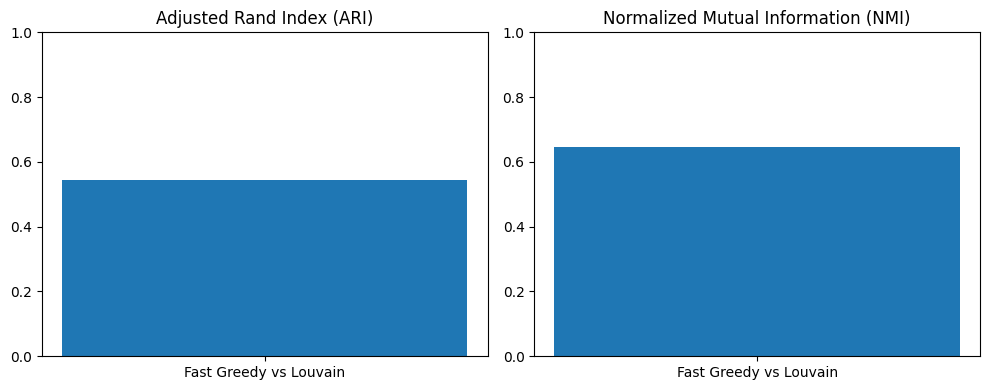

In [11]:
# 5. Apply various community detection algorithms on a small real-world network (e.g.
# Karate club) and plot the communities revealed with different colors. Also, compare
# the results of these algorithms using any two evaluation measures studied. Show the
# comparative results using bar plots.


# ============================================================
# COMMUNITY DETECTION: FAST GREEDY vs LOUVAIN (Karate Club)
# ============================================================


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
# igraph for fast greedy algorithm
import igraph as ig
# Louvain method
import community.community_louvain as community_louvain
# ------------------------------------------------------------
# Load Karate Club Network
# ------------------------------------------------------------


G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_color="lightblue")
plt.title("Zachary Karate Club Network")
plt.show()
# ------------------------------------------------------------
# Convert NetworkX to igraph for Fast-Greedy Algorithm
# ------------------------------------------------------------


G_nodes = list(G.nodes())
ig_graph = ig.Graph()
ig_graph.add_vertices(len(G_nodes))


# add edges using indices of nodes
edge_list = [(G_nodes.index(u), G_nodes.index(v)) for u, v in G.edges()]
ig_graph.add_edges(edge_list)


# ------------------------------------------------------------
# Fast Greedy Community Detection
# ------------------------------------------------------------
fg = ig_graph.community_fastgreedy().as_clustering()
# Map igraph node index → original NetworkX node label
mapped_fastgreedy_comms = []
for comm in fg:
   mapped_fastgreedy_comms.append([G_nodes[idx] for idx in comm])


fast_greedy_comms = mapped_fastgreedy_comms
# ------------------------------------------------------------
# Louvain Community Detection
# ------------------------------------------------------------
louvain_partition = community_louvain.best_partition(G)

louvain_comms = {}
for node, com in louvain_partition.items():
   louvain_comms.setdefault(com, []).append(node)


louvain_comms = list(louvain_comms.values())


# ------------------------------------------------------------
# Visualization Function
# ------------------------------------------------------------
def draw_communities(G, comms, title):
   colors = plt.cm.tab10(np.linspace(0, 1, len(comms)))
   node_colors = {}


   for idx, c in enumerate(comms):
       for node in c:
           node_colors[node] = colors[idx]


   plt.figure(figsize=(6,6))
   nx.draw(
       G,
       pos,
       node_color=[node_colors[n] for n in G.nodes()],
       with_labels=True
   )
   plt.title(title)
   plt.show()
# ------------------------------------------------------------
# Visualize Results
# ------------------------------------------------------------
draw_communities(G, fast_greedy_comms, "Fast Greedy Communities")
draw_communities(G, louvain_comms, "Louvain Communities")
# ------------------------------------------------------------
# Convert communities to label arrays for ARI/NMI
# ------------------------------------------------------------
def comms_to_labels(comms, n_nodes):
   labels = [-1] * n_nodes
   for cid, nodes in enumerate(comms):
       for node in nodes:
           labels[node] = cid
   return labels


n_nodes = G.number_of_nodes()
labels_fg = comms_to_labels(fast_greedy_comms, n_nodes)
labels_lv = comms_to_labels(louvain_comms, n_nodes)
# ------------------------------------------------------------
# Evaluation
# ------------------------------------------------------------
ari_score = adjusted_rand_score(labels_fg, labels_lv)
nmi_score = normalized_mutual_info_score(labels_fg, labels_lv)


print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)
# ------------------------------------------------------------
# Bar Plot for Comparison
# ------------------------------------------------------------
plt.figure(figsize=(10,4))


# ARI
plt.subplot(1,2,1)
plt.bar(["Fast Greedy vs Louvain"], [ari_score])
plt.title("Adjusted Rand Index (ARI)")
plt.ylim(0,1)


# NMI
plt.subplot(1,2,2)
plt.bar(["Fast Greedy vs Louvain"], [nmi_score])
plt.title("Normalized Mutual Information (NMI)")
plt.ylim(0,1)


plt.tight_layout()
plt.show()

In [8]:
pip install python-igraph

# Task
The code in cell `bGCAh1qdGa8Z` failed with a `SyntaxError`. To fix this, I will remove the first line `-------------` from the cell, as it's causing the error. After fixing the syntax error, I will execute the cell to perform community detection, visualize communities, and compare the algorithms.

## run_code_cell_bGCAh1qdGa8Z

### Subtask:
Execute the code in cell bGCAh1qdGa8Z to perform community detection, visualize communities, and compare algorithms after installing igraph.


## Summary:

### Data Analysis Key Findings
*   A `SyntaxError` was identified in the code cell `bGCAh1qdGa8Z`, caused by an extraneous line `-------------`.
*   The `SyntaxError` was resolved by removing the problematic line.

### Insights or Next Steps
*   The next step is to execute the corrected code cell to perform community detection, visualize the communities, and compare the performance or results of different algorithms as originally intended.
